C:\Users\Novikov Viktor\AppData\Local\Temp\ipykernel_19352\1090369413.py:8: RuntimeWarning: overflow encountered in scalar power
  dydt = x**2 - 1
C:\Users\Novikov Viktor\AppData\Local\Temp\ipykernel_19352\1090369413.py:45: RuntimeWarning: invalid value encountered in subtract
  k3 = f(t[i] + h, X[i] - h*k1 + 2*h*k2)
C:\Users\Novikov Viktor\AppData\Local\Temp\ipykernel_19352\1090369413.py:76: RuntimeWarning: invalid value encountered in subtract
  X[i+1] = X[i] + h * (1.5 * f(t[i], X[i]) - 0.5 * f(t[i-1], X[i-1]))
C:\Users\Novikov Viktor\AppData\Local\Temp\ipykernel_19352\1090369413.py:94: RuntimeWarning: invalid value encountered in subtract
  X[i+1] = X[i] + h * (23/12 * f(t[i], X[i]) - 4/3 * f(t[i-1], X[i-1]) + 5/12 * f(t[i-2], X[i-2]))
C:\Users\Novikov Viktor\AppData\Local\Temp\ipykernel_19352\1090369413.py:115: RuntimeWarning: invalid value encountered in subtract
  X[i+1] = X[i] + h * (55/24 * f(t[i], X[i]) - 59/24 * f(t[i-1], X[i-1]) + 37/24 * f(t[i-2], X[i-2]) - 3/8 * f(t[i-3],

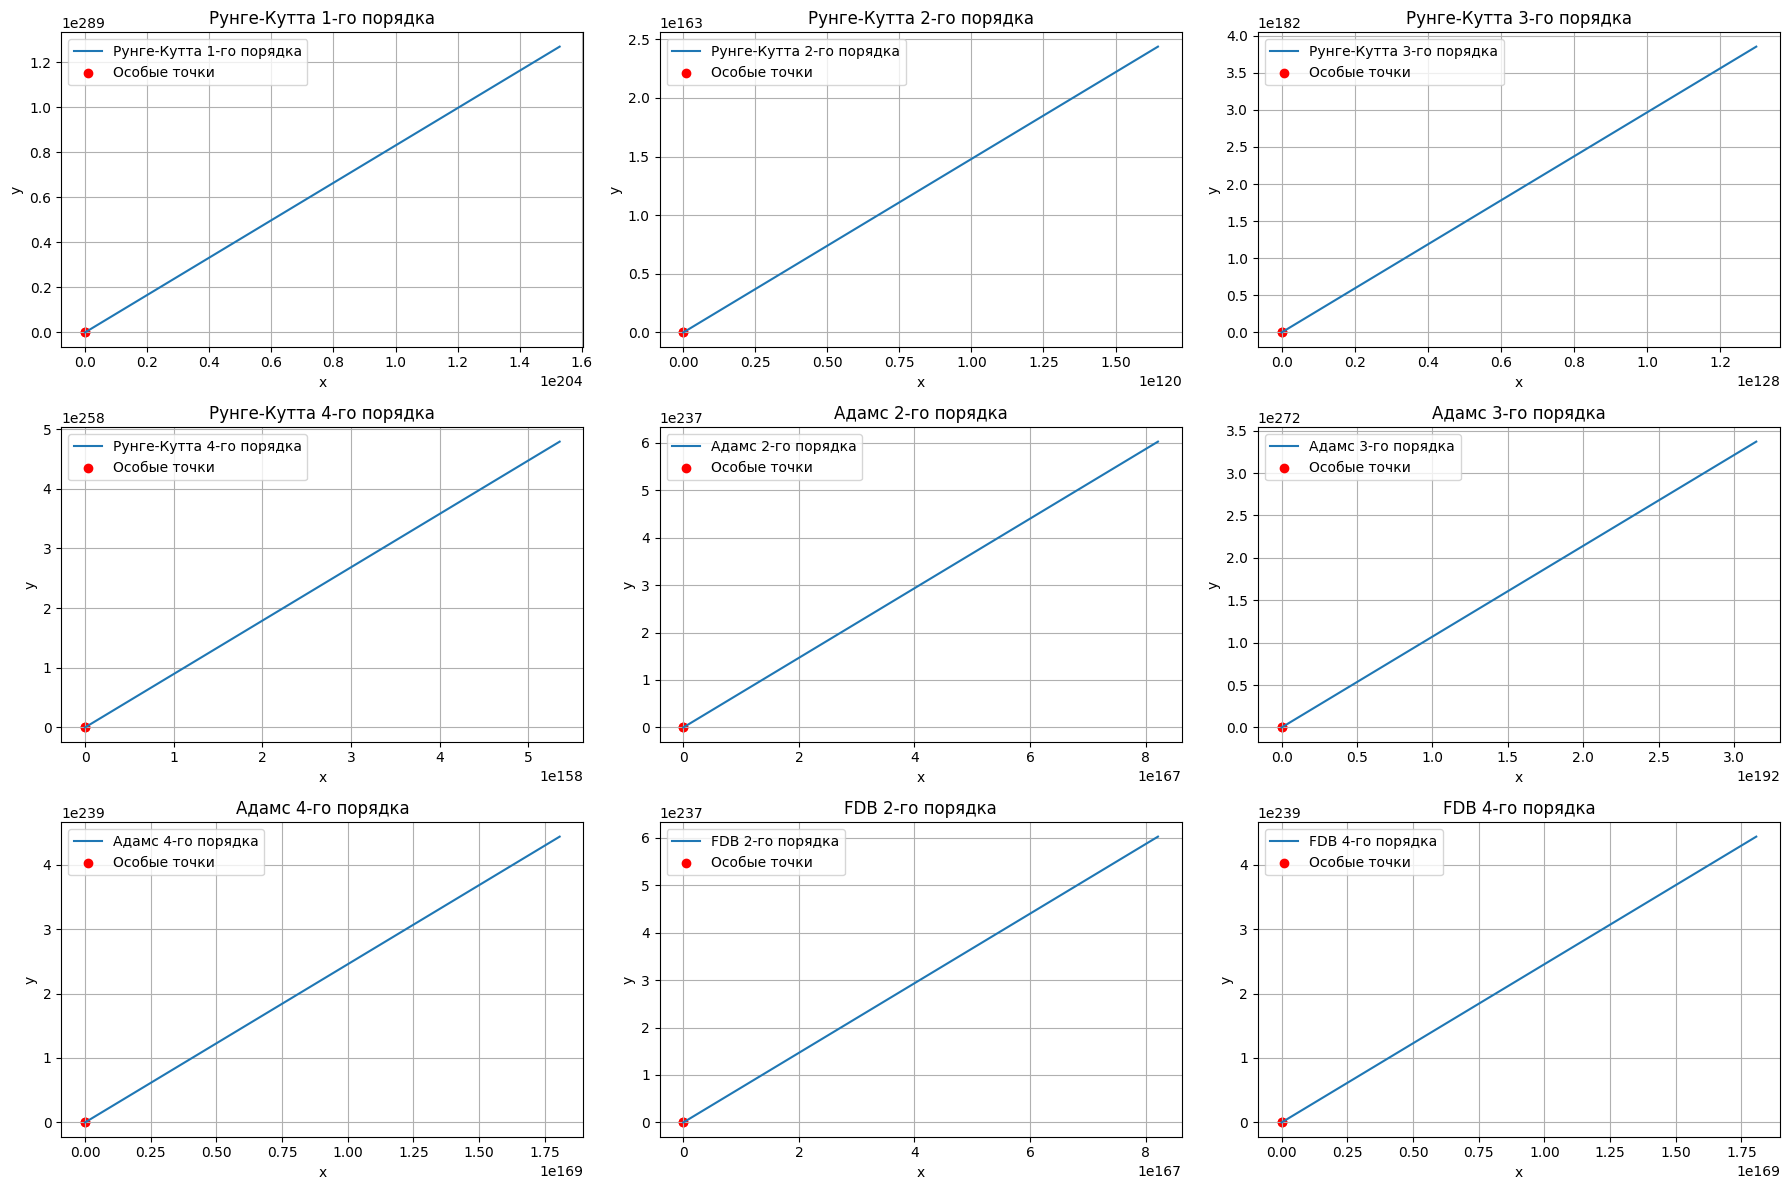

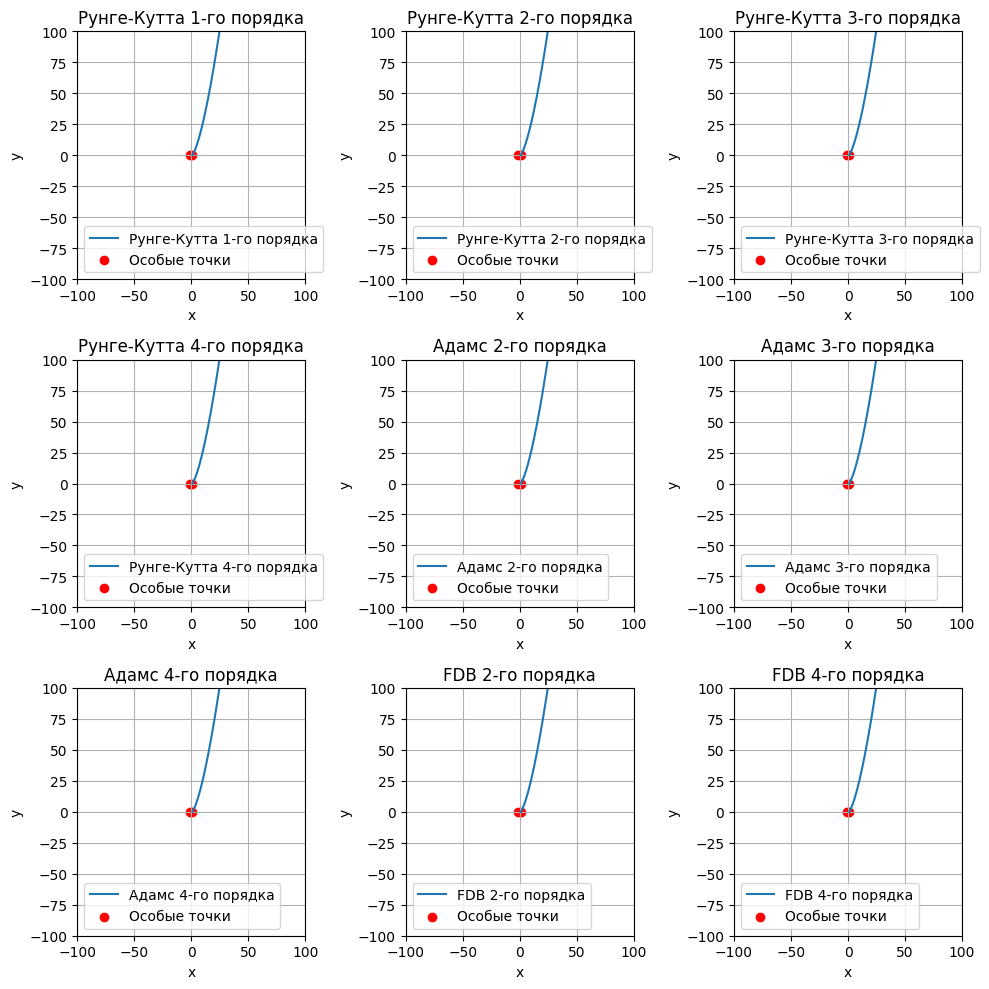

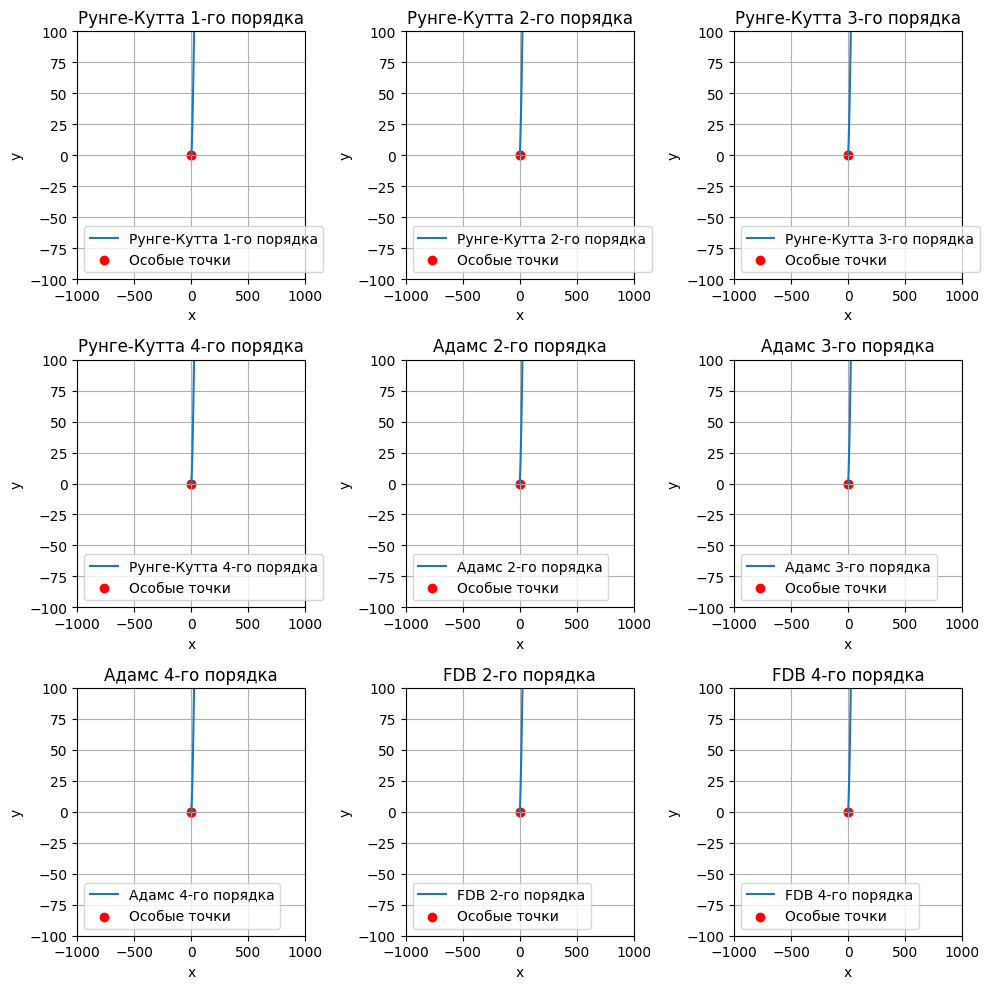

In [9]:
import numpy as np
import matplotlib.pyplot as plt

# Определение системы ОДУ
def system(t, X):
    x, y = X
    dxdt = y
    dydt = x**2 - 1
    return np.array([dxdt, dydt])

# Метод Рунге-Кутта первого порядка (метод Эйлера)
def runge_kutta_1st_order(f, t0, X0, h, n):
    t = np.zeros(n+1)
    X = np.zeros((n+1, 2))
    t[0] = t0
    X[0] = X0
    for i in range(n):
        t[i+1] = t[i] + h
        X[i+1] = X[i] + h * f(t[i], X[i])
    return t, X

# Метод Рунге-Кутта второго порядка
def runge_kutta_2nd_order(f, t0, X0, h, n):
    t = np.zeros(n+1)
    X = np.zeros((n+1, 2))
    t[0] = t0
    X[0] = X0
    for i in range(n):
        t[i+1] = t[i] + h
        k1 = f(t[i], X[i])
        k2 = f(t[i] + h/2, X[i] + h/2 * k1)
        X[i+1] = X[i] + h * k2
    return t, X

# Метод Рунге-Кутта третьего порядка
def runge_kutta_3rd_order(f, t0, X0, h, n):
    t = np.zeros(n+1)
    X = np.zeros((n+1, 2))
    t[0] = t0
    X[0] = X0
    for i in range(n):
        t[i+1] = t[i] + h
        k1 = f(t[i], X[i])
        k2 = f(t[i] + h/2, X[i] + h/2 * k1)
        k3 = f(t[i] + h, X[i] - h*k1 + 2*h*k2)
        X[i+1] = X[i] + h/6 * (k1 + 4*k2 + k3)
    return t, X

# Метод Рунге-Кутта четвертого порядка
def runge_kutta_4th_order(f, t0, X0, h, n):
    t = np.zeros(n+1)
    X = np.zeros((n+1, 2))
    t[0] = t0
    X[0] = X0
    for i in range(n):
        t[i+1] = t[i] + h
        k1 = f(t[i], X[i])
        k2 = f(t[i] + h/2, X[i] + h/2 * k1)
        k3 = f(t[i] + h/2, X[i] + h/2 * k2)
        k4 = f(t[i] + h, X[i] + h * k3)
        X[i+1] = X[i] + h/6 * (k1 + 2*k2 + 2*k3 + k4)
    return t, X

# Метод Адамса второго порядка (явный)
def adams_2nd_order(f, t0, X0, h, n):
    t = np.zeros(n+1)
    X = np.zeros((n+1, 2))
    t[0] = t0
    X[0] = X0
    # Разгонный участок методом Рунге-Кутта второго порядка
    _, X_temp = runge_kutta_2nd_order(f, t0, X0, h, 1)
    X[1] = X_temp[1]  # Берем только последний элемент
    t[1] = t[0] + h
    for i in range(1, n):
        t[i+1] = t[i] + h
        X[i+1] = X[i] + h * (1.5 * f(t[i], X[i]) - 0.5 * f(t[i-1], X[i-1]))
    return t, X

# Метод Адамса третьего порядка (явный)
def adams_3rd_order(f, t0, X0, h, n):
    t = np.zeros(n+1)
    X = np.zeros((n+1, 2))
    t[0] = t0
    X[0] = X0
    # Разгонный участок методом Рунге-Кутта третьего порядка
    _, X_temp = runge_kutta_3rd_order(f, t0, X0, h, 1)
    X[1] = X_temp[1]  # Берем только последний элемент
    t[1] = t[0] + h
    _, X_temp = runge_kutta_3rd_order(f, t[1], X[1], h, 1)
    X[2] = X_temp[1]  # Берем только последний элемент
    t[2] = t[1] + h
    for i in range(2, n):
        t[i+1] = t[i] + h
        X[i+1] = X[i] + h * (23/12 * f(t[i], X[i]) - 4/3 * f(t[i-1], X[i-1]) + 5/12 * f(t[i-2], X[i-2]))
    return t, X

# Метод Адамса четвертого порядка (явный)
def adams_4th_order(f, t0, X0, h, n):
    t = np.zeros(n+1)
    X = np.zeros((n+1, 2))
    t[0] = t0
    X[0] = X0
    # Разгонный участок методом Рунге-Кутта четвертого порядка
    _, X_temp = runge_kutta_4th_order(f, t0, X0, h, 1)
    X[1] = X_temp[1]  # Берем только последний элемент
    t[1] = t[0] + h
    _, X_temp = runge_kutta_4th_order(f, t[1], X[1], h, 1)
    X[2] = X_temp[1]  # Берем только последний элемент
    t[2] = t[1] + h
    _, X_temp = runge_kutta_4th_order(f, t[2], X[2], h, 1)
    X[3] = X_temp[1]  # Берем только последний элемент
    t[3] = t[2] + h
    for i in range(3, n):
        t[i+1] = t[i] + h
        X[i+1] = X[i] + h * (55/24 * f(t[i], X[i]) - 59/24 * f(t[i-1], X[i-1]) + 37/24 * f(t[i-2], X[i-2]) - 3/8 * f(t[i-3], X[i-3]))
    return t, X

# Метод Формулы Дифференцирования Назад (FDB) второго порядка
def fdb_2nd_order(f, t0, X0, h, n):
    t = np.zeros(n+1)
    X = np.zeros((n+1, 2))
    t[0] = t0
    X[0] = X0
    # Разгонный участок методом Рунге-Кутта второго порядка
    _, X_temp = runge_kutta_2nd_order(f, t0, X0, h, 1)
    X[1] = X_temp[1]  # Берем только последний элемент
    t[1] = t[0] + h
    for i in range(1, n):
        t[i+1] = t[i] + h
        X[i+1] = X[i] + h * (1.5 * f(t[i], X[i]) - 0.5 * f(t[i-1], X[i-1]))
    return t, X

# Метод Формулы Дифференцирования Назад (FDB) третьего порядка
def fdb_3rd_order(f, t0, X0, h, n):
    t = np.zeros(n+1)
    X = np.zeros((n+1, 2))
    t[0] = t0
    X[0] = X0
    # Разгонный участок методом Рунге-Кутта третьего порядка
    _, X_temp = runge_kutta_3rd_order(f, t0, X0, h, 1)
    X[1] = X_temp[1]  # Берем только последний элемент
    t[1] = t[0] + h
    _, X_temp = runge_kutta_3rd_order(f, t[1], X[1], h, 1)
    X[2] = X_temp[1]  # Берем только последний элемент
    t[2] = t[1] + h
    for i in range(2, n):
        t[i+1] = t[i] + h
        X[i+1] = X[i] + h * (23/12 * f(t[i], X[i]) - 4/3 * f(t[i-1], X[i-1]) + 5/12 * f(t[i-2], X[i-2]))
    return t, X

# Метод Формулы Дифференцирования Назад (FDB) четвертого порядка
def fdb_4th_order(f, t0, X0, h, n):
    t = np.zeros(n+1)
    X = np.zeros((n+1, 2))
    t[0] = t0
    X[0] = X0
    # Разгонный участок методом Рунге-Кутта четвертого порядка
    _, X_temp = runge_kutta_4th_order(f, t0, X0, h, 1)
    X[1] = X_temp[1]  # Берем только последний элемент
    t[1] = t[0] + h
    _, X_temp = runge_kutta_4th_order(f, t[1], X[1], h, 1)
    X[2] = X_temp[1]  # Берем только последний элемент
    t[2] = t[1] + h
    _, X_temp = runge_kutta_4th_order(f, t[2], X[2], h, 1)
    X[3] = X_temp[1]  # Берем только последний элемент
    t[3] = t[2] + h
    for i in range(3, n):
        t[i+1] = t[i] + h
        X[i+1] = X[i] + h * (55/24 * f(t[i], X[i]) - 59/24 * f(t[i-1], X[i-1]) + 37/24 * f(t[i-2], X[i-2]) - 3/8 * f(t[i-3], X[i-3]))
    return t, X

# Параметры решения
t0 = 0
X0 = np.array([1.1, 0.0])  # Начальные условия (x0, y0)
h = 0.01
n = 1000

# Решение системы всеми методами
t1, X1 = runge_kutta_1st_order(system, t0, X0, h, n)
t2, X2 = runge_kutta_2nd_order(system, t0, X0, h, n)
t3, X3 = runge_kutta_3rd_order(system, t0, X0, h, n)
t4, X4 = runge_kutta_4th_order(system, t0, X0, h, n)
t_adams2, X_adams2 = adams_2nd_order(system, t0, X0, h, n)
t_adams3, X_adams3 = adams_3rd_order(system, t0, X0, h, n)
t_adams4, X_adams4 = adams_4th_order(system, t0, X0, h, n)
t_fdb2, X_fdb2 = fdb_2nd_order(system, t0, X0, h, n)
t_fdb3, X_fdb3 = fdb_3rd_order(system, t0, X0, h, n)
t_fdb4, X_fdb4 = fdb_4th_order(system, t0, X0, h, n)

# Построение графиков
plt.figure(figsize=(18, 12))

# Методы Рунге-Кутта
plt.subplot(3, 3, 1)
plt.plot(X1[:, 0], X1[:, 1], label='Рунге-Кутта 1-го порядка')
plt.scatter([1, -1], [0, 0], color='red', label='Особые точки')
plt.title('Рунге-Кутта 1-го порядка')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid()

plt.subplot(3, 3, 2)
plt.plot(X2[:, 0], X2[:, 1], label='Рунге-Кутта 2-го порядка')
plt.scatter([1, -1], [0, 0], color='red', label='Особые точки')
plt.title('Рунге-Кутта 2-го порядка')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid()

plt.subplot(3, 3, 3)
plt.plot(X3[:, 0], X3[:, 1], label='Рунге-Кутта 3-го порядка')
plt.scatter([1, -1], [0, 0], color='red', label='Особые точки')
plt.title('Рунге-Кутта 3-го порядка')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid()

plt.subplot(3, 3, 4)
plt.plot(X4[:, 0], X4[:, 1], label='Рунге-Кутта 4-го порядка')
plt.scatter([1, -1], [0, 0], color='red', label='Особые точки')
plt.title('Рунге-Кутта 4-го порядка')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid()

# Методы Адамса
plt.subplot(3, 3, 5)
plt.plot(X_adams2[:, 0], X_adams2[:, 1], label='Адамс 2-го порядка')
plt.scatter([1, -1], [0, 0], color='red', label='Особые точки')
plt.title('Адамс 2-го порядка')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid()

plt.subplot(3, 3, 6)
plt.plot(X_adams3[:, 0], X_adams3[:, 1], label='Адамс 3-го порядка')
plt.scatter([1, -1], [0, 0], color='red', label='Особые точки')
plt.title('Адамс 3-го порядка')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid()

plt.subplot(3, 3, 7)
plt.plot(X_adams4[:, 0], X_adams4[:, 1], label='Адамс 4-го порядка')
plt.scatter([1, -1], [0, 0], color='red', label='Особые точки')
plt.title('Адамс 4-го порядка')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid()

# Методы FDB
plt.subplot(3, 3, 8)
plt.plot(X_fdb2[:, 0], X_fdb2[:, 1], label='FDB 2-го порядка')
plt.scatter([1, -1], [0, 0], color='red', label='Особые точки')
plt.title('FDB 2-го порядка')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid()

plt.subplot(3, 3, 9)
plt.plot(X_fdb4[:, 0], X_fdb4[:, 1], label='FDB 4-го порядка')
plt.scatter([1, -1], [0, 0], color='red', label='Особые точки')
plt.title('FDB 4-го порядка')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()

# Построение графиков
plt.figure(figsize=(10, 10))  # Уменьшаем размер фигуры до 10x10

# Методы Рунге-Кутта
plt.subplot(3, 3, 1)
plt.plot(X1[:, 0], X1[:, 1], label='Рунге-Кутта 1-го порядка')
plt.scatter([1, -1], [0, 0], color='red', label='Особые точки')
plt.title('Рунге-Кутта 1-го порядка')
plt.xlabel('x')
plt.ylabel('y')
plt.xlim(-100, 100)  # Ограничение по оси x
plt.ylim(-100, 100)  # Ограничение по оси y
plt.legend()
plt.grid()

plt.subplot(3, 3, 2)
plt.plot(X2[:, 0], X2[:, 1], label='Рунге-Кутта 2-го порядка')
plt.scatter([1, -1], [0, 0], color='red', label='Особые точки')
plt.title('Рунге-Кутта 2-го порядка')
plt.xlabel('x')
plt.ylabel('y')
plt.xlim(-100, 100)  # Ограничение по оси x
plt.ylim(-100, 100)  # Ограничение по оси y
plt.legend()
plt.grid()

plt.subplot(3, 3, 3)
plt.plot(X3[:, 0], X3[:, 1], label='Рунге-Кутта 3-го порядка')
plt.scatter([1, -1], [0, 0], color='red', label='Особые точки')
plt.title('Рунге-Кутта 3-го порядка')
plt.xlabel('x')
plt.ylabel('y')
plt.xlim(-100, 100)  # Ограничение по оси x
plt.ylim(-100, 100)  # Ограничение по оси y
plt.legend()
plt.grid()

plt.subplot(3, 3, 4)
plt.plot(X4[:, 0], X4[:, 1], label='Рунге-Кутта 4-го порядка')
plt.scatter([1, -1], [0, 0], color='red', label='Особые точки')
plt.title('Рунге-Кутта 4-го порядка')
plt.xlabel('x')
plt.ylabel('y')
plt.xlim(-100, 100)  # Ограничение по оси x
plt.ylim(-100, 100)  # Ограничение по оси y
plt.legend()
plt.grid()

# Методы Адамса
plt.subplot(3, 3, 5)
plt.plot(X_adams2[:, 0], X_adams2[:, 1], label='Адамс 2-го порядка')
plt.scatter([1, -1], [0, 0], color='red', label='Особые точки')
plt.title('Адамс 2-го порядка')
plt.xlabel('x')
plt.ylabel('y')
plt.xlim(-100, 100)  # Ограничение по оси x
plt.ylim(-100, 100)  # Ограничение по оси y
plt.legend()
plt.grid()

plt.subplot(3, 3, 6)
plt.plot(X_adams3[:, 0], X_adams3[:, 1], label='Адамс 3-го порядка')
plt.scatter([1, -1], [0, 0], color='red', label='Особые точки')
plt.title('Адамс 3-го порядка')
plt.xlabel('x')
plt.ylabel('y')
plt.xlim(-100, 100)  # Ограничение по оси x
plt.ylim(-100, 100)  # Ограничение по оси y
plt.legend()
plt.grid()

plt.subplot(3, 3, 7)
plt.plot(X_adams4[:, 0], X_adams4[:, 1], label='Адамс 4-го порядка')
plt.scatter([1, -1], [0, 0], color='red', label='Особые точки')
plt.title('Адамс 4-го порядка')
plt.xlabel('x')
plt.ylabel('y')
plt.xlim(-100, 100)  # Ограничение по оси x
plt.ylim(-100, 100)  # Ограничение по оси y
plt.legend()
plt.grid()

# Методы FDB
plt.subplot(3, 3, 8)
plt.plot(X_fdb2[:, 0], X_fdb2[:, 1], label='FDB 2-го порядка')
plt.scatter([1, -1], [0, 0], color='red', label='Особые точки')
plt.title('FDB 2-го порядка')
plt.xlabel('x')
plt.ylabel('y')
plt.xlim(-100, 100)  # Ограничение по оси x
plt.ylim(-100, 100)  # Ограничение по оси y
plt.legend()
plt.grid()

plt.subplot(3, 3, 9)
plt.plot(X_fdb4[:, 0], X_fdb4[:, 1], label='FDB 4-го порядка')
plt.scatter([1, -1], [0, 0], color='red', label='Особые точки')
plt.title('FDB 4-го порядка')
plt.xlabel('x')
plt.ylabel('y')
plt.xlim(-100, 100)  # Ограничение по оси x
plt.ylim(-100, 100)  # Ограничение по оси y
plt.legend()
plt.grid()

plt.tight_layout()  # Улучшает расположение подграфиков
plt.show()

# Построение графиков
plt.figure(figsize=(10, 10))  # Уменьшаем размер фигуры до 10x10

# Методы Рунге-Кутта
plt.subplot(3, 3, 1)
plt.plot(X1[:, 0], X1[:, 1], label='Рунге-Кутта 1-го порядка')
plt.scatter([1, -1], [0, 0], color='red', label='Особые точки')
plt.title('Рунге-Кутта 1-го порядка')
plt.xlabel('x')
plt.ylabel('y')
plt.xlim(-1000, 1000)  # Ограничение по оси x до 1000
plt.ylim(-100, 100)    # Ограничение по оси y
plt.legend()
plt.grid()

plt.subplot(3, 3, 2)
plt.plot(X2[:, 0], X2[:, 1], label='Рунге-Кутта 2-го порядка')
plt.scatter([1, -1], [0, 0], color='red', label='Особые точки')
plt.title('Рунге-Кутта 2-го порядка')
plt.xlabel('x')
plt.ylabel('y')
plt.xlim(-1000, 1000)  # Ограничение по оси x до 1000
plt.ylim(-100, 100)    # Ограничение по оси y
plt.legend()
plt.grid()

plt.subplot(3, 3, 3)
plt.plot(X3[:, 0], X3[:, 1], label='Рунге-Кутта 3-го порядка')
plt.scatter([1, -1], [0, 0], color='red', label='Особые точки')
plt.title('Рунге-Кутта 3-го порядка')
plt.xlabel('x')
plt.ylabel('y')
plt.xlim(-1000, 1000)  # Ограничение по оси x до 1000
plt.ylim(-100, 100)    # Ограничение по оси y
plt.legend()
plt.grid()

plt.subplot(3, 3, 4)
plt.plot(X4[:, 0], X4[:, 1], label='Рунге-Кутта 4-го порядка')
plt.scatter([1, -1], [0, 0], color='red', label='Особые точки')
plt.title('Рунге-Кутта 4-го порядка')
plt.xlabel('x')
plt.ylabel('y')
plt.xlim(-1000, 1000)  # Ограничение по оси x до 1000
plt.ylim(-100, 100)    # Ограничение по оси y
plt.legend()
plt.grid()

# Методы Адамса
plt.subplot(3, 3, 5)
plt.plot(X_adams2[:, 0], X_adams2[:, 1], label='Адамс 2-го порядка')
plt.scatter([1, -1], [0, 0], color='red', label='Особые точки')
plt.title('Адамс 2-го порядка')
plt.xlabel('x')
plt.ylabel('y')
plt.xlim(-1000, 1000)  # Ограничение по оси x до 1000
plt.ylim(-100, 100)    # Ограничение по оси y
plt.legend()
plt.grid()

plt.subplot(3, 3, 6)
plt.plot(X_adams3[:, 0], X_adams3[:, 1], label='Адамс 3-го порядка')
plt.scatter([1, -1], [0, 0], color='red', label='Особые точки')
plt.title('Адамс 3-го порядка')
plt.xlabel('x')
plt.ylabel('y')
plt.xlim(-1000, 1000)  # Ограничение по оси x до 1000
plt.ylim(-100, 100)    # Ограничение по оси y
plt.legend()
plt.grid()

plt.subplot(3, 3, 7)
plt.plot(X_adams4[:, 0], X_adams4[:, 1], label='Адамс 4-го порядка')
plt.scatter([1, -1], [0, 0], color='red', label='Особые точки')
plt.title('Адамс 4-го порядка')
plt.xlabel('x')
plt.ylabel('y')
plt.xlim(-1000, 1000)  # Ограничение по оси x до 1000
plt.ylim(-100, 100)    # Ограничение по оси y
plt.legend()
plt.grid()

# Методы FDB
plt.subplot(3, 3, 8)
plt.plot(X_fdb2[:, 0], X_fdb2[:, 1], label='FDB 2-го порядка')
plt.scatter([1, -1], [0, 0], color='red', label='Особые точки')
plt.title('FDB 2-го порядка')
plt.xlabel('x')
plt.ylabel('y')
plt.xlim(-1000, 1000)  # Ограничение по оси x до 1000
plt.ylim(-100, 100)    # Ограничение по оси y
plt.legend()
plt.grid()

plt.subplot(3, 3, 9)
plt.plot(X_fdb4[:, 0], X_fdb4[:, 1], label='FDB 4-го порядка')
plt.scatter([1, -1], [0, 0], color='red', label='Особые точки')
plt.title('FDB 4-го порядка')
plt.xlabel('x')
plt.ylabel('y')
plt.xlim(-1000, 1000)  # Ограничение по оси x до 1000
plt.ylim(-100, 100)    # Ограничение по оси y
plt.legend()
plt.grid()

plt.tight_layout()  # Улучшает расположение подграфиков
plt.show()